# Logic

Demonstration of fuzzy logic.

In [1]:
import numpy as np
import torch

In [2]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

In [3]:
import sys
sys.path.insert(0, '../python')

In [4]:
from fuzzy_torch import logic

In [5]:
# Selecting logics.
Logics = {
    "Godel": logic.Godel,
    "Product": logic.Product,
    "Lukasiewicz": logic.Lukasiewicz,
    "Nilpotent": logic.Nilpotent,
    "Hamacher": logic.Hamacher
}

## Basic operations

In [6]:
N_x = 101
N_y = 101

eps = 0.0
x = torch.linspace(eps, 1.0 - eps, N_x)
y = torch.linspace(eps, 1.0 - eps, N_y)

# Grid.
x_grid, y_grid = torch.meshgrid(x, y, indexing="xy")
X = x_grid.flatten()[:,None]
Y = y_grid.flatten()[:,None]

In [7]:
def plot_inference_surface(x, y, values, labels):
    n_values = len(values)
    
    _values = []
    for index in range(n_values):
        _values.append(values[index].detach().numpy().reshape((N_x, N_y)))

    fig, axs = plt.subplots(1, n_values, figsize=(16, 16))
    fig.tight_layout()
    
    for index in range(n_values):
        axs[index].set_box_aspect(1)
        axs[index].set_xbound(lower=0.0, upper=1.0)
        axs[index].set_xbound(lower=0.0, upper=1.0)
        
        axs[index].grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1,   which='major')
        axs[index].grid(color='#000000', alpha=0.1,  linestyle='-', linewidth=0.5, which='minor')
        
        cfset = axs[index].contourf(x, y, _values[index], cmap='Blues', levels=20)
        axs[index].set_title(labels[index], fontsize=16)
        
        axs[index].get_xaxis().set_ticks([])
        axs[index].get_yaxis().set_ticks([])
    
        axs[index].set_xlabel('x', fontsize=12)
        axs[index].set_ylabel('y', fontsize=12)

### Fuzzy AND

In [8]:
values = []
labels = []
for label, logic in Logics.items():
    values.append(logic.fuzzy_and(X, Y))
    labels.append(label)

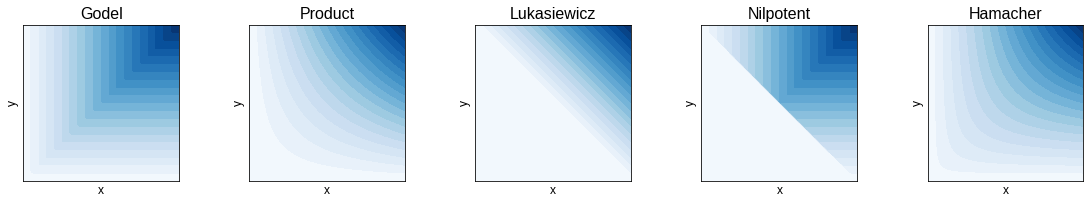

In [9]:
plot_inference_surface(x, y, values, labels)

### Fuzzy OR

In [10]:
values = []
labels = []
for label, logic in Logics.items():
    values.append(logic.fuzzy_or(X, Y))
    labels.append(label)

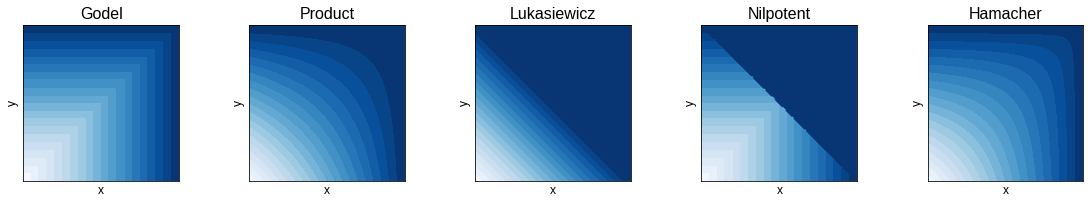

In [11]:
plot_inference_surface(x, y, values, labels)

### Fuzzy IMPL

In [12]:
values = []
labels = []
for label, logic in Logics.items():
    values.append(logic.fuzzy_impl(X, Y))
    labels.append(label)

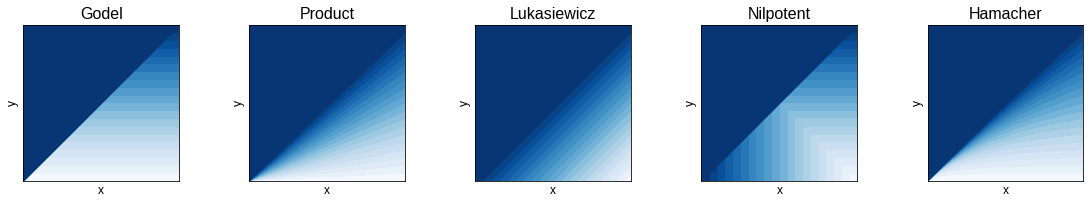

In [13]:
plot_inference_surface(x, y, values, labels)

### Fuzzy EQUIV

In [14]:
values = []
labels = []
for label, logic in Logics.items():
    values.append(logic.fuzzy_equiv(X, Y))
    labels.append(label)

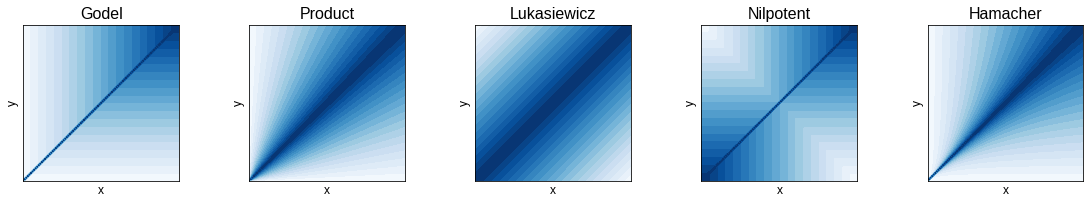

In [15]:
plot_inference_surface(x, y, values, labels)

### Value of $ (\neg x \vee y) \leftrightarrow (x \rightarrow y) $

In [16]:
values = []
labels = []
for label, logic in Logics.items():
    values.append(
        logic.fuzzy_equiv(logic.fuzzy_or(logic.fuzzy_not(X), Y),
                          logic.fuzzy_impl(X, Y))
    )
    labels.append(label)

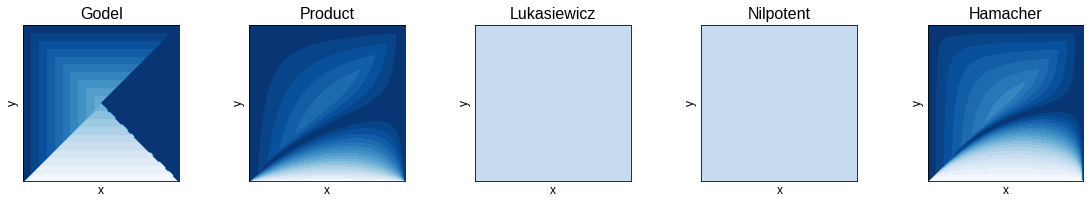

In [17]:
plot_inference_surface(x, y, values, labels)